In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

from sklearn.model_selection import train_test_split

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.utils.extmath import density

from sklearn import metrics
import model
from model import Model
import health_data
from health_data import DepressionHealthData
import imp


#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)


In [27]:
dhd = DepressionHealthData()
dhd.prepare_data()

Read Health Data
    SEQN  ACD011A  ACD011B  ACD011C  ACD040  ACD110  ALQ101  ALQ110  ALQ120Q  \
0  73557      1.0      NaN      NaN     NaN     NaN     1.0     NaN      1.0   
1  73557      1.0      NaN      NaN     NaN     NaN     1.0     NaN      1.0   
2  73558      1.0      NaN      NaN     NaN     NaN     1.0     NaN      7.0   
3  73558      1.0      NaN      NaN     NaN     NaN     1.0     NaN      7.0   
4  73558      1.0      NaN      NaN     NaN     NaN     1.0     NaN      7.0   

   ALQ120U  ALQ130  ALQ141Q  ALQ141U  ALQ151  ALQ160  BPQ020  BPQ030  BPD035  \
0      3.0     1.0      0.0      NaN     1.0     NaN     1.0     1.0    62.0   
1      3.0     1.0      0.0      NaN     1.0     NaN     1.0     1.0    62.0   
2      1.0     4.0      2.0      1.0     1.0     0.0     1.0     1.0    53.0   
3      1.0     4.0      2.0      1.0     1.0     0.0     1.0     1.0    53.0   
4      1.0     4.0      2.0      1.0     1.0     0.0     1.0     1.0    53.0   

   BPQ040A  BPQ050A  

In [29]:
sum = dhd.get_depression_status()

Function: get_depression_status Total Time Used: 0.028870344161987305


In [139]:
df = dhd.df
demographics_feature = ["RIAGENDR", "RIDRETH3", "DMQMILIZ", "DMDMARTL", "RIDEXPRG", "DMDHHSIZ", "DMDFMSIZ"]
blood_pressure = ["BPQ060", "BPQ090D", "BPQ100D"]
card_health = ["CDQ001"]
consumer_behavior = ["CBD130"]
#creatine_kinase = ["CKQ010", "CKQ020", "CKQ040", "CKQ070Q"]
current_health = ["HSQ571", "HSQ590"]
dermatology = ["DED031", "DEQ034A", "DEQ034C", "DEQ038G", "DED120"]
diabetes = ["DIQ010", "DIQ070"]
diet_behavior_nutrition = ["DBQ010", "DBD055", "DBQ700", "DBQ197", "DBQ301", "DBQ330", "DBQ360", "DBD381", "DBQ390", "CBQ550", "CBQ585", "DBD895"]
disablity = ["DLQ010", "DLQ020", "DLQ040", "DLQ050", "DLQ060", "DLQ080"]
drug_use = ["DUQ200", "DUQ219", "DUQ240", "DUQ272", "DUQ320", "DUQ352", "DUQ370", "DUQ410", "DUQ430"]
food = ["FSD032B", "FSD071", "FSD102", "FSD032D", "FSD146", "FSDHH", "FSD151", "FSQ165", "FSQ162", "FSD650ZC"]
health_insurance = ["HIQ210"]
home = ["HOD050", "HOQ065"]
hospital_utilization = ["HUQ051", "HUQ030", "HUQ071", "HUQ090"]
income = ["INQ020", "INQ012", "INQ030", "INQ060", "INQ080", "INQ090", "INQ132", "INQ140", "INQ150", "IND235"]
# kidney = ["KIQ022", "KIQ026", "KIQ005", "KIQ005"]
top25 = ["RXDCOUNT", "PFQ063B", "SLQ050", "HSD010", "SLD010H", "WTINT2YR", "WHQ150", "WHD010", "PAQ710", "INDFMMPI", "CDQ010", "MDHRAGE", "INDFMPIR", "CBD070", "CBD110", "SMD030", "SXD031", "IND235", "CBD120", "ALQ130"]
top50 = ["ALQ120Q", "WHD050", "DMDEDUC2", "DMDEDUC3", "WHD110", "DLQ050", "MCQ300C", "HUQ051", "RHD190", "CBQ580", "RIDAGEYR", "SMQ040", "OHQ680", "HOD050", "RHQ560Q", "WHD020", "HUQ010", "PAD680", "MCQ092", "DIQ070", "PFQ063A"]
top75 = ["DBD895", "PFQ063D", "OHQ870", "SXD101", "SXD171", "OHQ030", "DMDHRGND", "RHQ420", "PAD675", "DED031", "DED120", "DMDHRMAR", "BPD035", "BPQ050A", "BPQ050A", "PFQ061S", "OCD270", "OHQ875"]
top100 = ["OCQ180", "DBD900", "CBQ585", "FSD032B", "DMDHSEDU", "RHQ060", "MCQ370A", "DBQ235C", "OHQ033", "SXD171", "MCQ365C", "CDQ008", "DMDHHSZB", "SXQ610", "MCQ380", "PAQ715", "RHQ160", "INDFMIN2", "DBQ235B"]

# final_features = [
#   *demographics_feature, *blood_pressure, *card_health, *consumer_behavior, *current_health, 
#   *dermatology, *diabetes, *diet_behavior_nutrition, *disablity, *drug_use, *food, 
#   *health_insurance, *home, *hospital_utilization, *income, *top25, *top50, *top75]
# final_features = [*diet_behavior_nutrition, *disablity, *drug_use, *food, *home]
pre_features = [*top25]
final_not_one_hot_features = [x[1:] for x in pre_features if x[0] == '@']
final_one_hot_features = [x for x in pre_features if x[0] != '@']
final_features = [*final_not_one_hot_features, *final_one_hot_features]
detest = df[final_features].copy()
detest = pd.get_dummies(detest, columns=final_one_hot_features)
detest = detest.fillna(0)
detest.insert(0, 'SUM', sum)

In [140]:
from model import Model
m = Model(detest)
m.init_data_set()

Function: init_data_set Total Time Used: 0.0072629451751708984


In [141]:
m.train_logistic()

LogReg: 0.22022955523672882
Function: train_logistic Total Time Used: 1.590311050415039


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [145]:
m.train_random_forest()

RFC: 0.836441893830703
Function: train_random_forest Total Time Used: 2.145200252532959


RandomForestClassifier()

In [144]:
td = m.train_decision_tree()

DTC: 0.8134863701578192
Function: train_decision_tree Total Time Used: 0.1481630802154541


In [137]:
m.train_svm()

SVM: 0.23529411764705882
Function: train_svm Total Time Used: 27.439411163330078


SVC()

In [ ]:
m.train_mlp()

feature RXDCOUNT (0.111789)
feature WTINT2YR (0.090425)
feature WHQ150 (0.071794)
feature DMDHRAGE (0.070153)
feature CBD120 (0.063272)
feature INDFMMPI (0.060236)
feature WHD010 (0.057633)
feature CBD070 (0.056650)
feature INDFMPIR (0.049777)
feature SXD031 (0.045739)
feature PAQ710 (0.041760)
feature SLD010H (0.037687)
feature CBD110 (0.036020)
feature SMD030 (0.035527)
feature IND235 (0.034928)
feature ALQ130 (0.025796)
feature SLQ050_2.0 (0.020174)
feature PFQ063B_11.0 (0.011730)
feature CDQ010_1.0 (0.010647)
feature HSD010_4.0 (0.008717)
feature HSD010_5.0 (0.006701)
feature PFQ063B_20.0 (0.006322)
feature HSD010_2.0 (0.005660)
feature PFQ063B_14.0 (0.005418)
feature CDQ010_2.0 (0.005394)
feature HSD010_3.0 (0.004834)
feature PFQ063B_16.0 (0.003603)
feature HSD010_1.0 (0.003414)
feature PFQ063B_17.0 (0.003077)
feature PFQ063B_28.0 (0.002395)
feature PFQ063B_10.0 (0.001871)
feature PFQ063B_19.0 (0.001765)
feature CDQ010_7.0 (0.001646)
feature PFQ063B_23.0 (0.001438)
feature PFQ063B

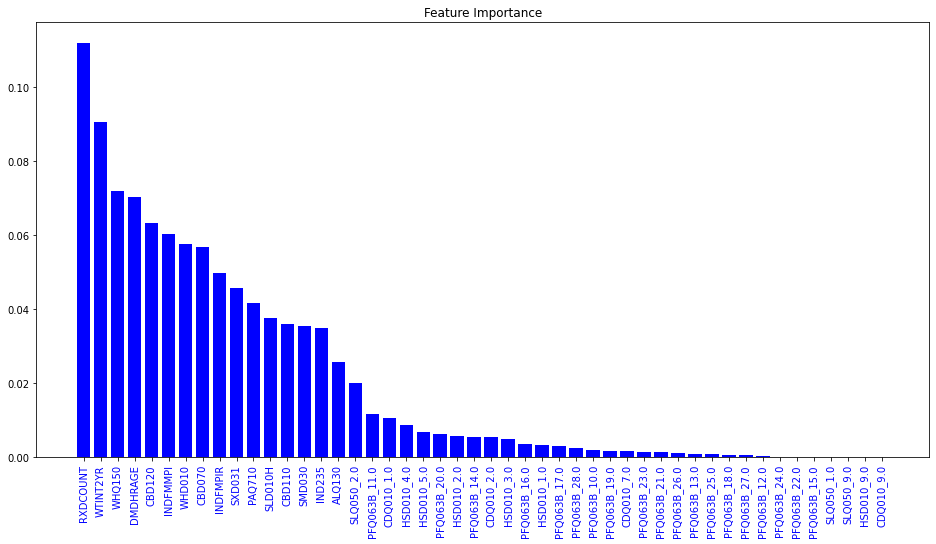

Function: feature_importance Total Time Used: 0.9398000240325928


In [146]:
m.feature_importance(td, showGraph=True)

In [ ]:
m.permutation_importance_graph(td)

In [64]:
import imp
imp.reload(model)
imp.reload(health_data)

<module 'health_data' from '/Users/wetabq/OneDrive - wetabq/Yibo Wu/Activity/YAU/depression/health_data.py'>

In [128]:
detest.head()

,SUM,WTINT2YR,INDFMMPI,DMDHRAGE,RXDCOUNT_1.0,RXDCOUNT_2.0,RXDCOUNT_3.0,RXDCOUNT_4.0,RXDCOUNT_5.0,RXDCOUNT_6.0,RXDCOUNT_7.0,RXDCOUNT_8.0,RXDCOUNT_9.0,RXDCOUNT_10.0,RXDCOUNT_11.0,RXDCOUNT_12.0,RXDCOUNT_13.0,RXDCOUNT_14.0,RXDCOUNT_15.0,RXDCOUNT_16.0,RXDCOUNT_17.0,RXDCOUNT_18.0,RXDCOUNT_19.0,RXDCOUNT_20.0,RXDCOUNT_23.0,PFQ063B_10.0,PFQ063B_11.0,PFQ063B_12.0,PFQ063B_13.0,PFQ063B_14.0,PFQ063B_15.0,PFQ063B_16.0,PFQ063B_17.0,PFQ063B_18.0,PFQ063B_19.0,PFQ063B_20.0,PFQ063B_21.0,PFQ063B_22.0,PFQ063B_23.0,PFQ063B_24.0,PFQ063B_25.0,PFQ063B_26.0,PFQ063B_27.0,PFQ063B_28.0,SLQ050_1.0,SLQ050_2.0,SLQ050_9.0,HSD010_1.0,HSD010_2.0,HSD010_3.0,HSD010_4.0,HSD010_5.0,HSD010_9.0,SLD010H_2.0,SLD010H_3.0,SLD010H_4.0,SLD010H_5.0,SLD010H_6.0,SLD010H_7.0,SLD010H_8.0,SLD010H_9.0,SLD010H_10.0,SLD010H_11.0,SLD010H_12.0,SLD010H_99.0,WHQ150_10.0,WHQ150_11.0,WHQ150_12.0,WHQ150_13.0,WHQ150_14.0,WHQ150_15.0,WHQ150_16.0,WHQ150_17.0,WHQ150_18.0,WHQ150_19.0,WHQ150_20.0,WHQ150_21.0,WHQ150_22.0,WHQ150_23.0,WHQ150_24.0,WHQ150_25.0,WHQ150_26.0,WHQ150_27.0,WHQ150_28.0,WHQ150_29.0,WHQ150_30.0,WHQ150_31.0,WHQ150_32.0,WHQ150_33.0,WHQ150_34.0,WHQ150_35.0,WHQ150_36.0,WHQ150_37.0,WHQ150_38.0,WHQ150_39.0,WHQ150_40.0,WHQ150_41.0,WHQ150_42.0,WHQ150_43.0,WHQ150_44.0,WHQ150_45.0,WHQ150_46.0,WHQ150_47.0,WHQ150_48.0,WHQ150_49.0,WHQ150_50.0,WHQ150_51.0,WHQ150_52.0,WHQ150_53.0,WHQ150_54.0,WHQ150_55.0,WHQ150_56.0,WHQ150_57.0,WHQ150_58.0,WHQ150_59.0,WHQ150_60.0,WHQ150_61.0,WHQ150_62.0,WHQ150_63.0,WHQ150_64.0,WHQ150_65.0,WHQ150_66.0,WHQ150_67.0,WHQ150_68.0,WHQ150_69.0,WHQ150_70.0,WHQ150_71.0,WHQ150_72.0,WHQ150_73.0,WHQ150_74.0,WHQ150_75.0,WHQ150_76.0,WHQ150_77.0,WHQ150_78.0,WHQ150_79.0,WHQ150_80.0,WHQ150_99999.0,WHD010_48.0,WHD010_53.0,WHD010_54.0,WHD010_55.0,WHD010_56.0,WHD010_57.0,WHD010_58.0,WHD010_59.0,WHD010_60.0,WHD010_61.0,WHD010_62.0,WHD010_63.0,WHD010_64.0,WHD010_65.0,WHD010_66.0,WHD010_67.0,WHD010_68.0,WHD010_69.0,WHD010_70.0,WHD010_71.0,WHD010_72.0,WHD010_73.0,WHD010_74.0,WHD010_75.0,WHD010_76.0,WHD010_77.0,WHD010_78.0,WHD010_79.0,WHD010_80.0,WHD010_81.0,WHD010_9999.0,PAQ710_0.0,PAQ710_1.0,PAQ710_2.0,PAQ710_3.0,PAQ710_4.0,PAQ710_5.0,PAQ710_8.0,PAQ710_99.0,CDQ010_1.0,CDQ010_2.0,CDQ010_7.0,CDQ010_9.0,INDFMPIR_0.0,INDFMPIR_0.01,INDFMPIR_0.02,INDFMPIR_0.03,INDFMPIR_0.04,INDFMPIR_0.05,INDFMPIR_0.06,INDFMPIR_0.07,INDFMPIR_0.08,INDFMPIR_0.09,INDFMPIR_0.1,INDFMPIR_0.11,INDFMPIR_0.12,INDFMPIR_0.13,INDFMPIR_0.16,INDFMPIR_0.17,INDFMPIR_0.18,INDFMPIR_0.19,INDFMPIR_0.2,INDFMPIR_0.21,INDFMPIR_0.22,INDFMPIR_0.23,INDFMPIR_0.24,INDFMPIR_0.25,INDFMPIR_0.26,INDFMPIR_0.27,INDFMPIR_0.28,INDFMPIR_0.29,INDFMPIR_0.3,INDFMPIR_0.31,INDFMPIR_0.32,INDFMPIR_0.33,INDFMPIR_0.34,INDFMPIR_0.35,INDFMPIR_0.36,INDFMPIR_0.37,INDFMPIR_0.38,INDFMPIR_0.39,INDFMPIR_0.4,INDFMPIR_0.41,INDFMPIR_0.42,INDFMPIR_0.43,INDFMPIR_0.44,INDFMPIR_0.45,INDFMPIR_0.46,INDFMPIR_0.47,INDFMPIR_0.48,INDFMPIR_0.49,INDFMPIR_0.5,INDFMPIR_0.51,INDFMPIR_0.52,INDFMPIR_0.53,INDFMPIR_0.54,INDFMPIR_0.55,INDFMPIR_0.56,INDFMPIR_0.57,INDFMPIR_0.58,INDFMPIR_0.59,INDFMPIR_0.6,INDFMPIR_0.61,INDFMPIR_0.62,INDFMPIR_0.63,INDFMPIR_0.64,INDFMPIR_0.65,INDFMPIR_0.66,INDFMPIR_0.67,INDFMPIR_0.68,INDFMPIR_0.69,INDFMPIR_0.7,INDFMPIR_0.71,INDFMPIR_0.72,INDFMPIR_0.73,INDFMPIR_0.74,INDFMPIR_0.75,INDFMPIR_0.76,INDFMPIR_0.77,INDFMPIR_0.78,INDFMPIR_0.79,INDFMPIR_0.8,INDFMPIR_0.81,INDFMPIR_0.82,INDFMPIR_0.83,INDFMPIR_0.84,INDFMPIR_0.85,INDFMPIR_0.86,INDFMPIR_0.87,INDFMPIR_0.88,INDFMPIR_0.89,INDFMPIR_0.9,INDFMPIR_0.91,INDFMPIR_0.92,INDFMPIR_0.93,INDFMPIR_0.94,INDFMPIR_0.95,INDFMPIR_0.96,INDFMPIR_0.97,INDFMPIR_0.98,INDFMPIR_0.99,INDFMPIR_1.0,INDFMPIR_1.01,INDFMPIR_1.02,INDFMPIR_1.03,INDFMPIR_1.04,INDFMPIR_1.05,INDFMPIR_1.06,INDFMPIR_1.07,INDFMPIR_1.08,INDFMPIR_1.09,INDFMPIR_1.1,INDFMPIR_1.11,INDFMPIR_1.12,INDFMPIR_1.13,INDFMPIR_1.14,INDFMPIR_1.15,INDFMPIR_1.16,INDFMPIR_1.17,INDFMPIR_1.18,INDFMPIR_1.19,INDFMPIR_1.2,INDFMPIR_1.21,INDFMPIR_1.22,INDFMPIR_1.23,INDFMPIR_1.24,INDFMPIR_1.25,INDFMPIR_1.26,INDFMPIR_1.27,INDFMPIR_1.28,INDFMPIR_1.29,INDFMPIR_1.3,INDFMPIR_1.31,INDFMPIR_

In [30]:
def range_encoding(df: DataFrame, encode_name: str, start: float, end: float, step: float, special: dict):
  for interval in range(start, end, step):
    df.insert(df.columns.get_loc(encode_name), f"{encode_name}_{interval}_{interval + step}", df[encode_name].apply(lambda x: 1 if x >= interval and x < interval + step else 0))
  for sp in special:
    df.insert(df.columns.get_loc(encode_name), f"{encode_name}_{sp}", df[encode_name].apply(lambda x: 1 if str(x) == str(sp) or (str(x) != str(np.NaN) and str(sp) != str(np.NaN) and str(int(x)) == str(int(sp))) else 0))
  df.drop([encode_name], inplace=True, axis=1)
  pass


In [31]:
top25 = ["RXDCOUNT", "PFQ063B", "SLQ050", "HSD010", "SLD010H", "WTINT2YR", "WHQ150", "WHD010", "PAQ710", "INDFMMPI", "CDQ010", "MDHRAGE", "INDFMPIR", "CBD070", "CBD110", "SMD030", "SXD031", "IND235", "CBD120", "ALQ130"]
top25onehot = ["PFQ063B", "SLQ050", "HSD010"]
NaNDict = ["NaN"]
RefusedIDK1 = ["7", "9"]
RefusedIDK2 = ["77", "99"]
RefusedIDK3 = ["777", "999"]
RefusedIDK4 = ["7777", "9999"]
RefusedIDK5 = ["77777", "99999"]
RefusedIDK6 = ["777777", "999999"]
RXDCOUNT = ["RXDCOUNT", 1, 23, 2, *NaNDict]
SLD010H = ["SLD010H", 2, 12, 2, *[*NaNDict, *RefusedIDK2]]
WHD010 = ["WHD010", 48, 81, 5, *[*NaNDict, *RefusedIDK4]]
df[df["PAQ710"] == 8] = 0
PAQ710 = ["PAQ710", 0, 5, 1, *[*NaNDict, *RefusedIDK2]]
INDFMMPI = ["INDFMMPI", 0, 5, 1, *[*NaNDict]]
CBD070 = ["CBD070", 0, 4400, 200, *[*NaNDict, *RefusedIDK6]]
CBD110 = ["CBD110", 0, 2000, 200, *[*NaNDict, *RefusedIDK6]]
SMD030 = ["SMD030", 7, 64, 10, ]



[1, 2, 3, 4, 5, 6, 7, 8]